In [1]:
# To make sure cwd is consistently in the correct place ie: C:/Users/__user__/__Path__/b1-coding-practical-mt25-SN

import sys, os

# Current working directory is the directory of the notebook file by default when first running the script
cwd = str(os.getcwd())

change_directory = False
# Moves up the directory folder chain until the directory ends with 'mt25-SN' ie: we are in the folder b1-coding-practical-mt25-SN
while cwd[-7:] != 'mt25-SN':
    os.chdir('../')
    cwd = str(os.getcwd())
    change_directory = True

if change_directory == True:
    # Add current working directory to the path so that modules and data can easily be found.
    sys.path.append(os.getcwd())


In [2]:
# You can double-check your Python path like this...
import sys

print(sys.path)

['/usr/lib/python313.zip', '/usr/lib/python3.13', '/usr/lib/python3.13/lib-dynload', '', '/home/samuel/Documents/GitHub_Repositories/B1_Practical/b1-coding-practical-mt25-SN/.venv/lib/python3.13/site-packages', '/home/samuel/Documents/GitHub_Repositories/B1_Practical/b1-coding-practical-mt25-SN']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [3]:
import numpy as np

# Import class data structures from uuv_mission/dyamic.py
from uuv_mission.dynamic import Mission, Submarine, ClosedLoop

# Import functions from uuv_mission/terrain.py
import uuv_mission.terrain as terrain

# Import functions from uuv_mission/control.py
from uuv_mission.control import Controller

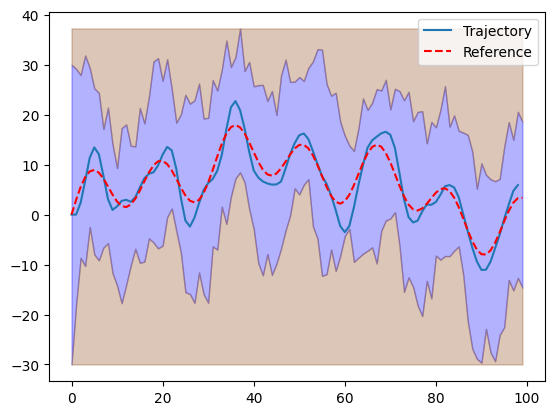

In [4]:
sub = Submarine()

# Instantiate your controller (depending on your implementation)
controller = Controller()

closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv") 

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)